## Análise de séries temporais - Banco Inter
    Dados retirados do site: https://finance.yahoo.com/quote/INBR32.SA/history?p=INBR32.SA - De 2022-08-26 até 2023-12-01

In [ ]:
pip install pmdarima

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pmdarima as pm

from pmdarima.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Dados Inter
INBR32 = pd.read_csv('/content/sample_data/INBR32.SA.csv')

#No caso, iremos utilizar somente os valores de fechamento - "Close"
INBR32.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-26,22.15,22.219999,21.00,21.15,21.15,2685566
1,2022-08-29,21.15,21.150000,21.15,21.15,21.15,0
2,2022-08-30,21.15,21.150000,21.15,21.15,21.15,0
3,2022-08-31,21.15,21.150000,21.15,21.15,21.15,0
4,2022-09-01,21.15,21.150000,21.15,21.15,21.15,0


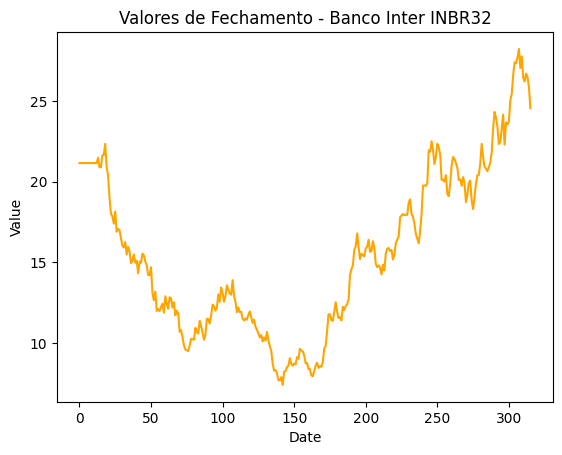

In [ ]:
# Plot
plt.plot(INBR32['Close'],'orange')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Valores de Fechamento - Banco Inter INBR32')
plt.show()

In [ ]:
#Visualização de features
INBR32.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
#Retirada das features não utilizadas
data = INBR32.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=0, inplace=False)
#São 315 dias de registro.
data.shape

(316, 2)

## Análise

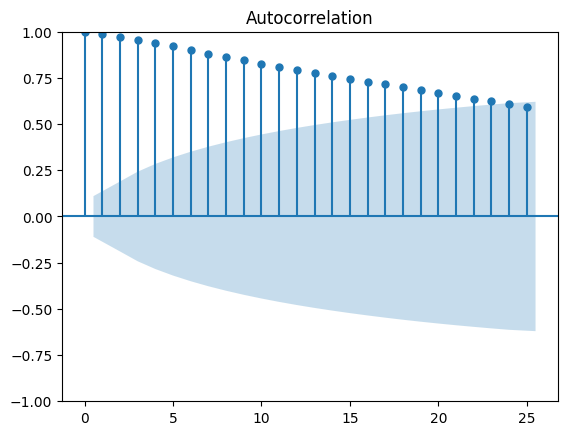

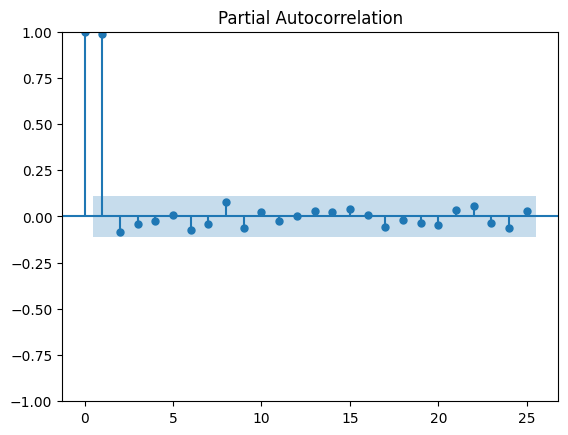

In [ ]:
#FAC e FACP
plot_acf(data['Close'])
plot_pacf(data['Close'])
plt.show()

#Percebe-se pelo FACP que o lag = 1.

Text(0, 0.5, 'difference price')

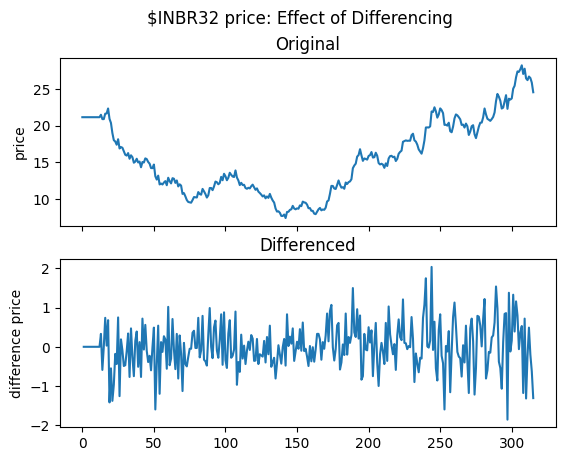

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('$INBR32 price: Effect of Differencing')
ax1.plot(data['Close'])
ax1.set_ylabel('price')
ax1.set_title('Original')
ax2.plot(data['Close'].diff())
ax2.set_title("Differenced")
ax2.set_ylabel('difference price')

In [ ]:
from statsmodels.tsa.stattools import adfuller
#H0 = A série não é estacionária.
def ADF_Cal(x):
    result = adfuller(x)
    ADF_stat = result[0]
    p = result[1]
    print("ADF Statistic: %f" % ADF_stat)
    print("p-value: %f" % p)
    print("Critical Values")
    levels = [.01, .05, .1]
    i = 0
    for key,value in result[4].items():
        print('\t%s: %.3f' % (key,value))
        hyp = p < levels[i]
        if ADF_stat < value:
            cert = (1-levels[i])*100
            print('Reject H0: {}'.format(hyp))
            break
        i = i+1
        if i >= 3:
            print("Less than 90% certain that data is stationary")
            print('Reject H0: {}'.format(hyp))

ADF_Cal(data['Close'].diff()[1:])

ADF Statistic: -16.724878
p-value: 0.000000
Critical Values
	1%: -3.451
Reject H0: True


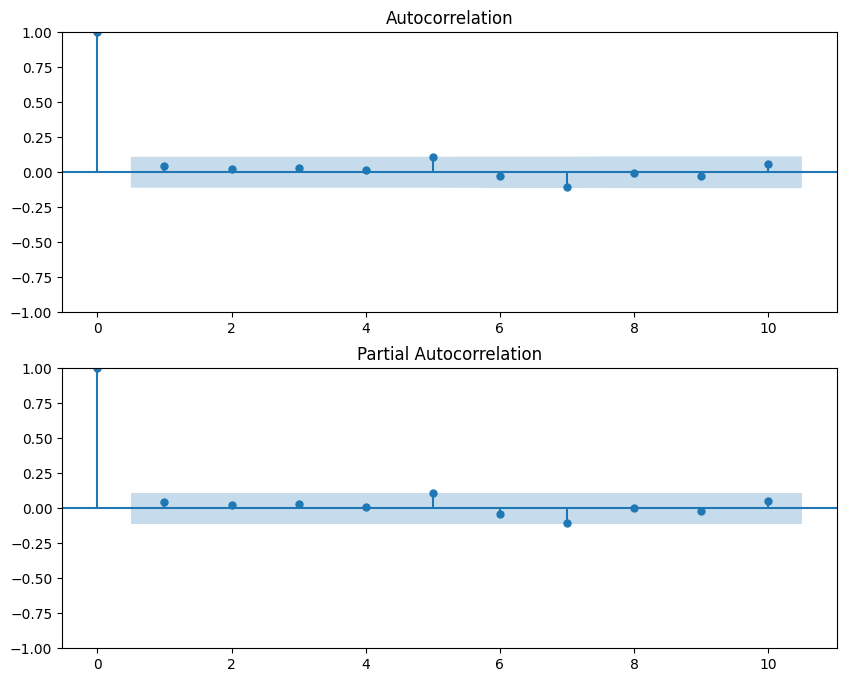

In [ ]:
# Plot ACF and PACF
diff_ts = data['Close'].diff()[1:]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(diff_ts, ax=ax1, lags = 10)
plot_pacf(diff_ts, ax=ax2, lags = 10)
plt.show()

In [ ]:
# Split train test
y_train, y_test = train_test_split(data['Close'], train_size= 0.8)
# Fit model
model=pm.auto_arima(y_train,start_p=0,d=0,start_q=0,
          max_p=5,max_d=5,max_q=5, start_P=0,
          D=0, start_Q=0, max_P=5,max_D=0,
          max_Q=5, seasonal=False,
          error_action='warn',trace=True,
          supress_warnings=True,
          random_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2061.983, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=407.012, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=408.271, Time=1.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=408.041, Time=0.23 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1449.929, Time=0.38 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=407.415, Time=0.41 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=405.176, Time=0.82 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1117.976, Time=0.30 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=406.471, Time=1.52 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=406.173, Time=0.86 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1414.622, Time=0.0

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  252
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -198.588
Date:                Wed, 06 Dec 2023   AIC                            405.176
Time:                        00:40:41   BIC                            419.293
Sample:                             0   HQIC                           410.856
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1030      0.138      0.748      0.454      -0.167       0.373
ar.L1          0.9944      0.009    110.729      0.000       0.977       1.012
ma.L1          0.0182      0.064      0.283      0.777      -0.108       0.144
sigma2         0.2781      0.020     13.788      0.000       0.239       0.318
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                17.04
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                             0.30
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

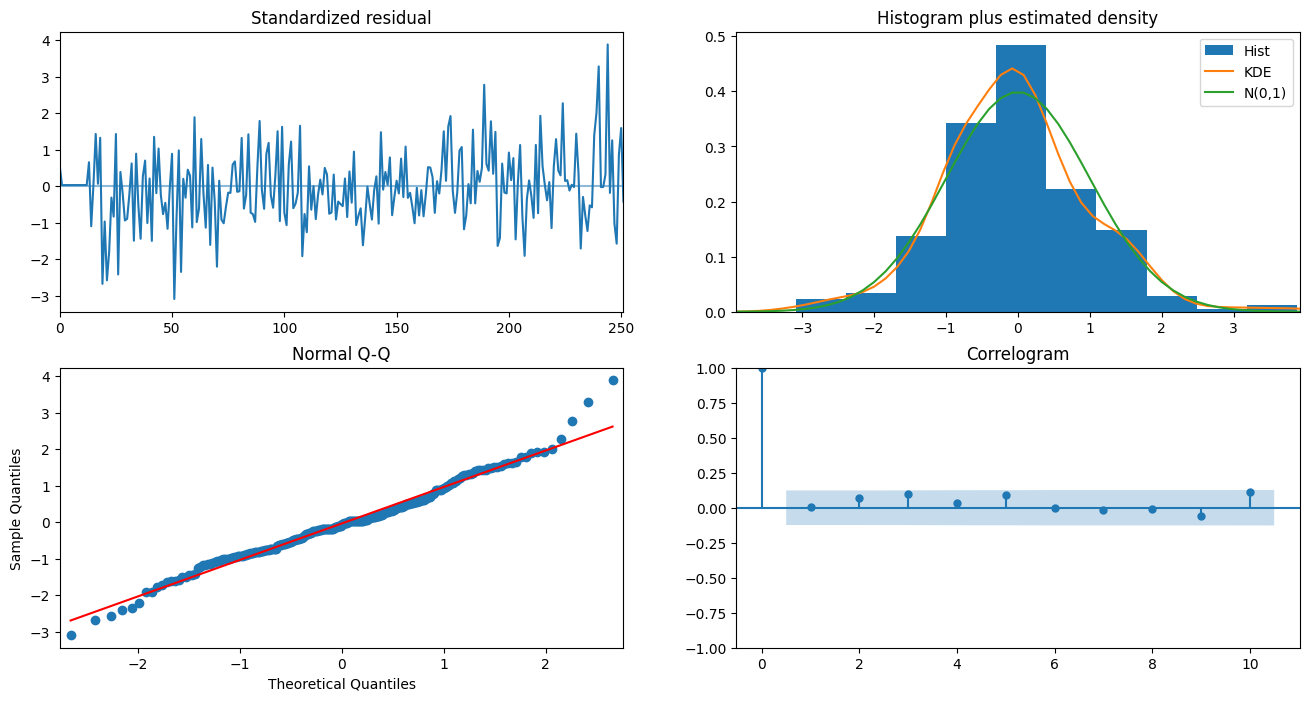

In [ ]:
plt.rc("figure", figsize=(16,8))
model.plot_diagnostics()
plt.show()

In [ ]:
ar_mod = ARIMA(y_train, order=(1,1,0))
ar_fit = ar_mod.fit()
print(ar_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  252
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -196.037
Date:                Wed, 06 Dec 2023   AIC                            396.074
Time:                        00:40:43   BIC                            403.125
Sample:                             0   HQIC                           398.911
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0189      0.063      0.299      0.765      -0.105       0.143
sigma2         0.2792      0.020     13.830      0.000       0.240       0.319
Ljung-Box (L1) (Q):                   0.00   Jarque-

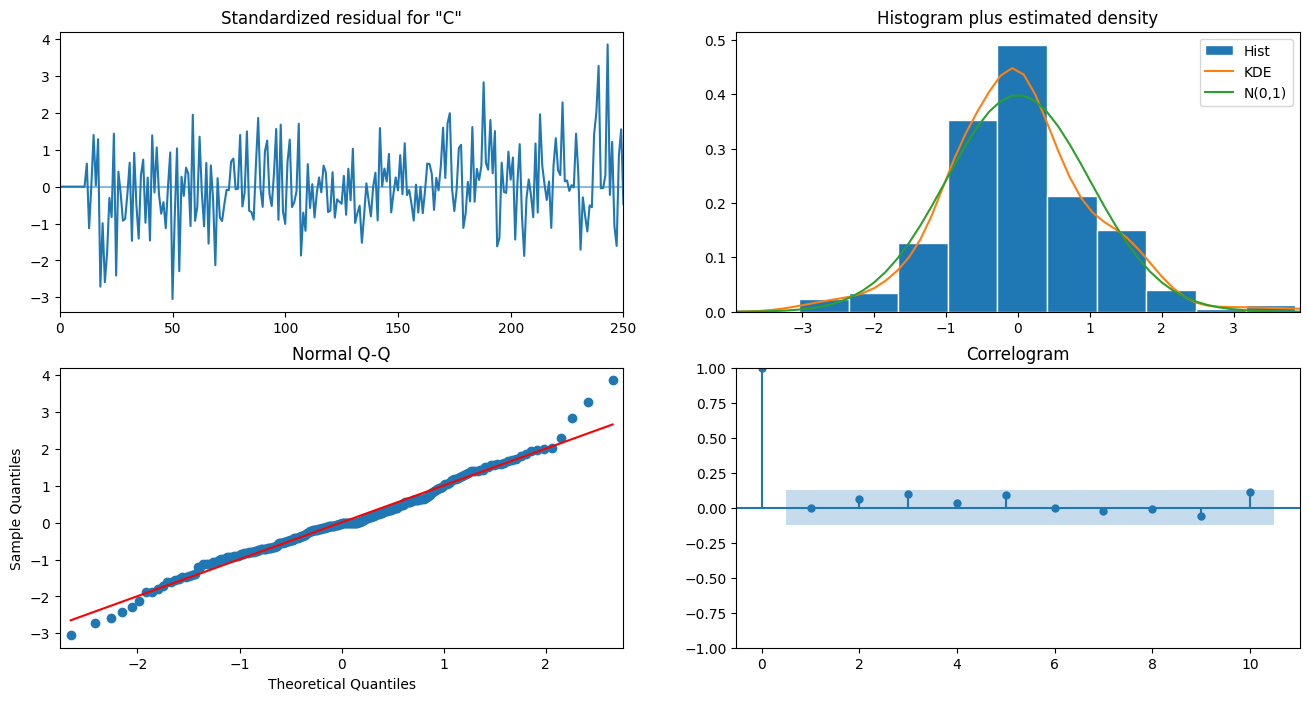

In [ ]:
ar_fit.plot_diagnostics()
plt.show()

In [ ]:
arima_mod = ARIMA(y_train, order=(1,1,1))
arima_fit = arima_mod.fit()
print(arima_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -194.364
Date:                Wed, 06 Dec 2023   AIC                            394.728
Time:                        00:40:46   BIC                            405.304
Sample:                             0   HQIC                           398.984
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9830      0.034     28.885      0.000       0.916       1.050
ma.L1         -0.9593      0.049    -19.464      0.000      -1.056      -0.863
sigma2         0.2753      0.021     13.151      0.0

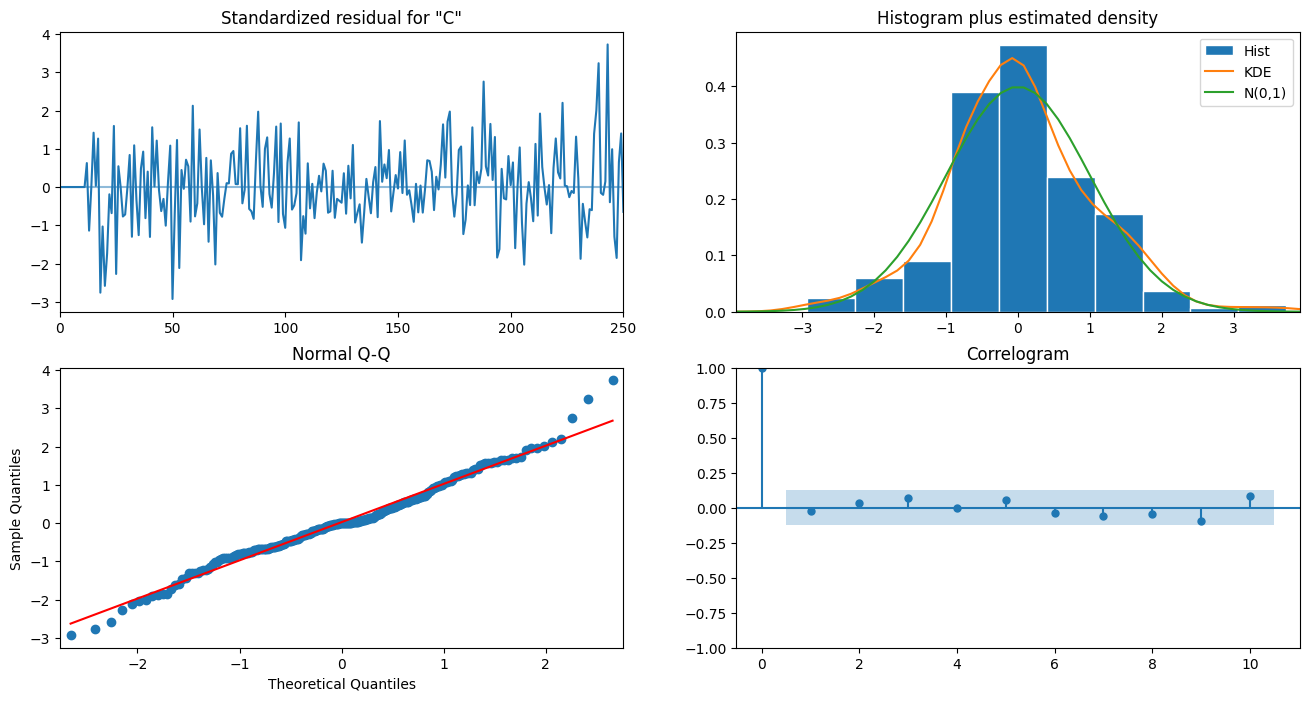

In [ ]:
arima_fit.plot_diagnostics()
plt.show()

In [ ]:
best_mod = ARIMA(y_train, order=(1,0,1))
best_fit = best_mod.fit()
print(best_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  252
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -198.588
Date:                Wed, 06 Dec 2023   AIC                            405.176
Time:                        00:40:49   BIC                            419.293
Sample:                             0   HQIC                           410.856
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.4030      7.509      2.451      0.014       3.686      33.120
ar.L1          0.9944      0.009    110.726      0.000       0.977       1.012
ma.L1          0.0182      0.064      0.283      0.7

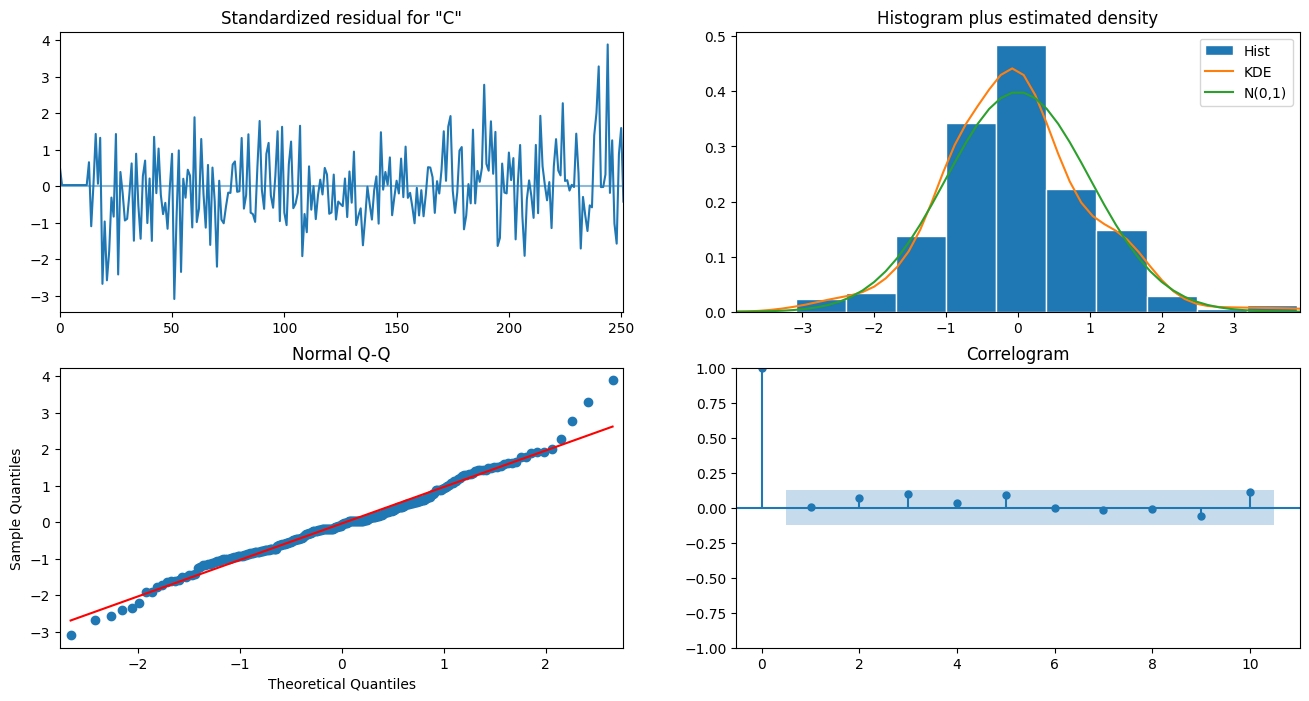

In [ ]:
best_fit.plot_diagnostics()
plt.show()

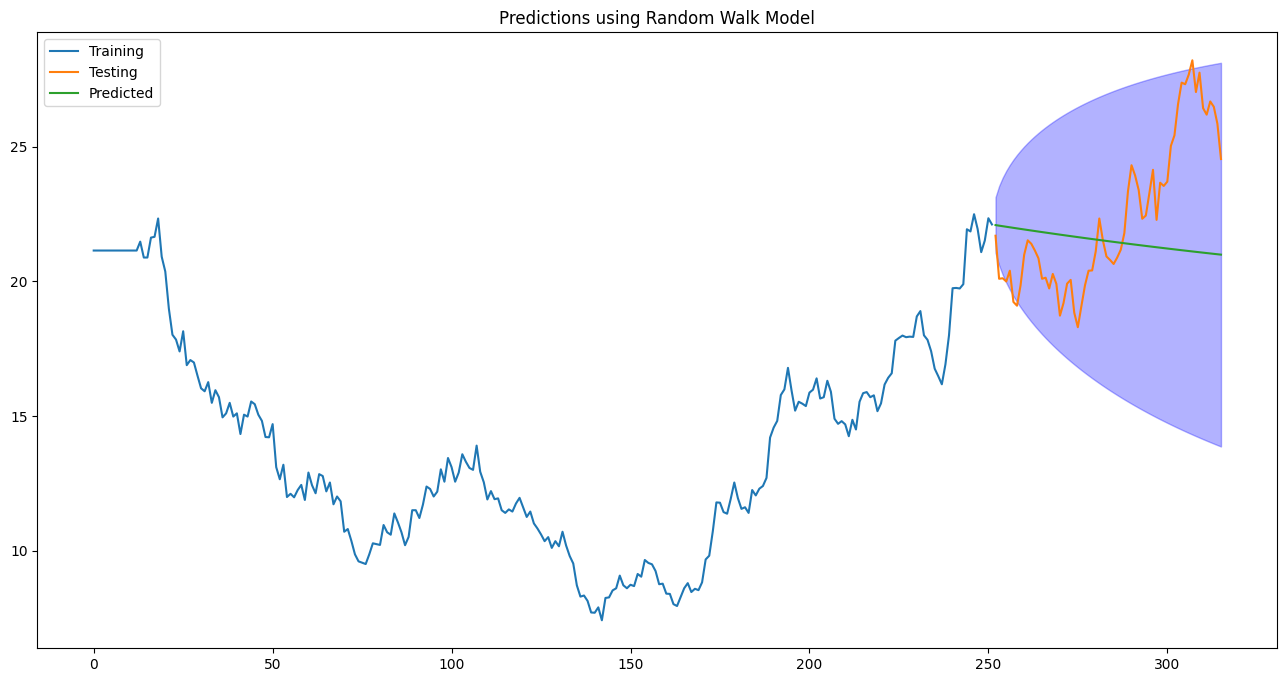

In [ ]:
# Obtain predictions from random walk model
rw_preds = pd.DataFrame(model.predict(n_periods = y_test.shape[0]))
rw_preds['date'] = y_test.index
rw_preds = rw_preds.set_index('date')
rw_preds.columns = ['predictions']

# Get CI
model_pred_ci = model.predict(y_test.shape[0], return_conf_int=True)
pred, ci = model_pred_ci
lower = list(list(zip(*ci))[0])
upper = list(list(zip(*ci))[1])

# Make plot of predictions
plt.plot(y_train,label="Training")
plt.plot(y_test,label="Testing")

plt.plot(rw_preds['predictions'],label="Predicted")
plt.fill_between(y_test.index, lower, upper, color='blue', alpha=0.3)

plt.legend(loc = 'upper left')
plt.title('Predictions using Random Walk Model')
plt.show()

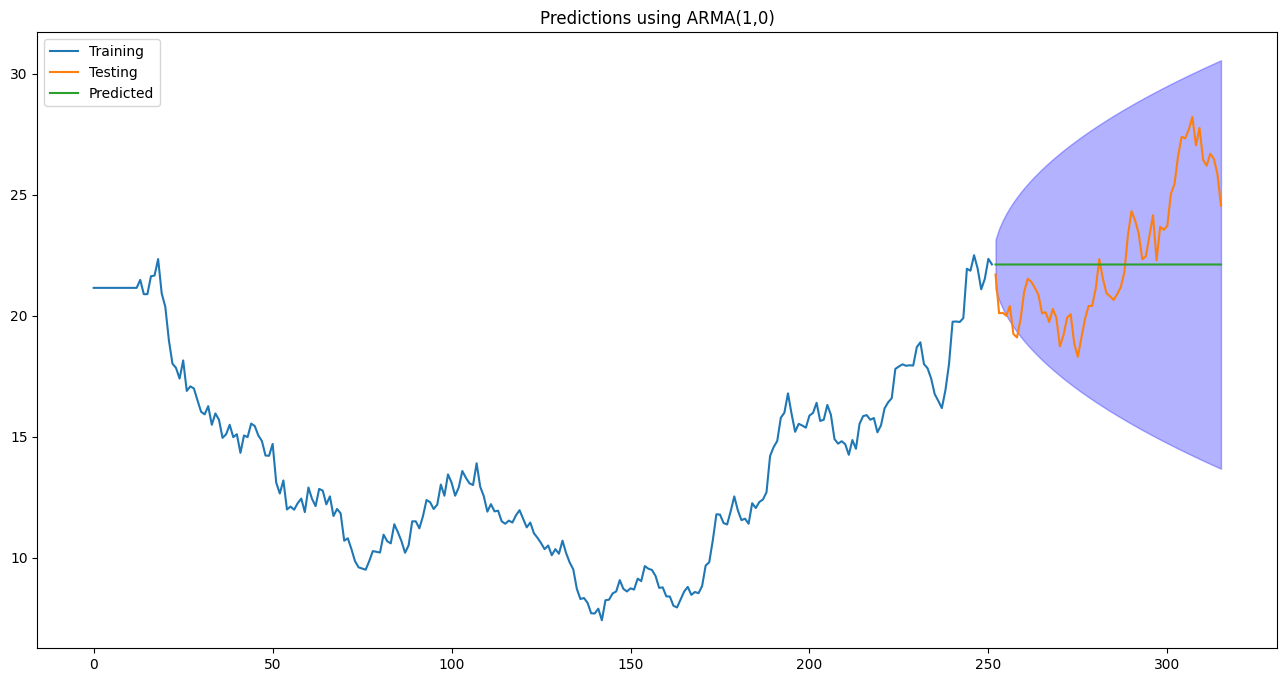

In [ ]:
# Obtain predictions from ARMA(1,0) model on X_t
ar_preds = pd.DataFrame(ar_fit.forecast(y_test.shape[0]))
ar_preds['date'] = y_test.index
ar_preds = ar_preds.set_index('date')
ar_preds.columns = ['predictions']

# Get CI
ar_pred_ci = ar_fit.get_forecast(y_test.shape[0]).conf_int()
ar_pred_ci['date'] = y_test.index
ar_pred_ci = ar_pred_ci.set_index('date')
# Make plot of predictions
plt.plot(y_train,label="Training")
plt.plot(y_test,label="Testing")
plt.plot(ar_preds['predictions'],label="Predicted")
plt.fill_between(ar_pred_ci.index, ar_pred_ci.iloc[:,0], ar_pred_ci.iloc[:,1], color='blue', alpha=0.3)
plt.legend(loc = 'upper left')
plt.title('Predictions using ARMA(1,0)')
plt.show()

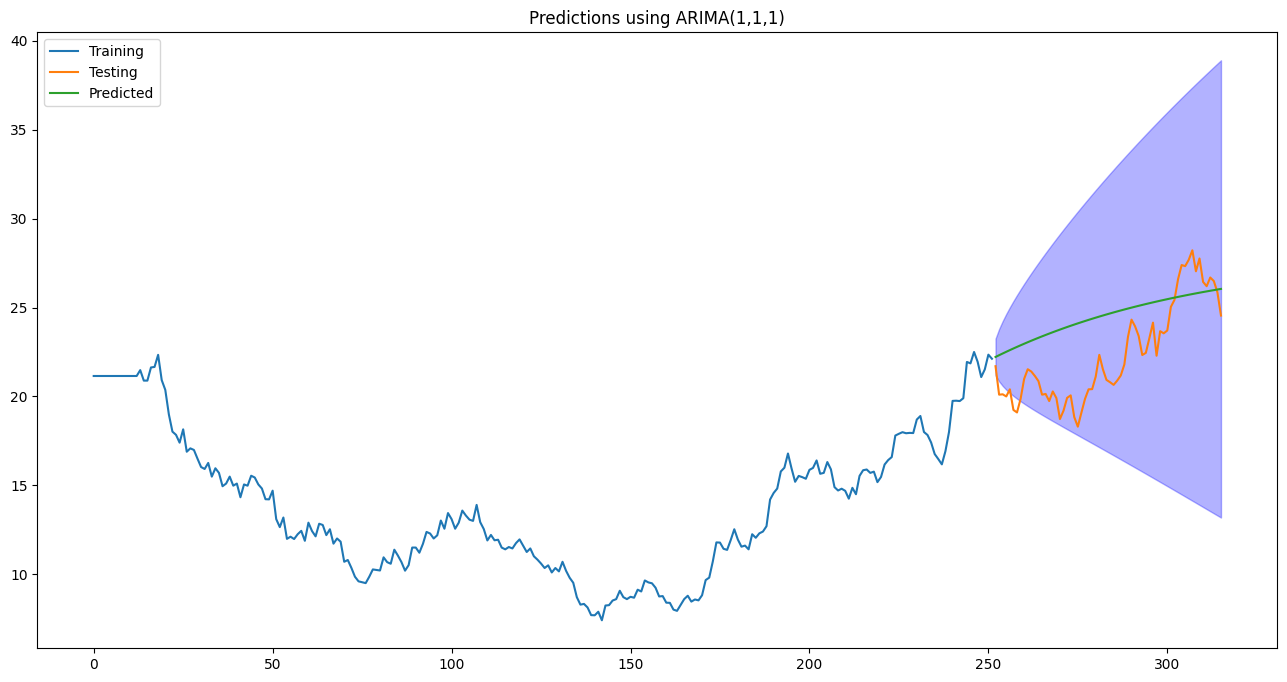

In [ ]:
# Obtain predictions from ARIMA(1,1,1) model on X_t
ar_preds = pd.DataFrame(arima_fit.forecast(y_test.shape[0]))
ar_preds['date'] = y_test.index
ar_preds = ar_preds.set_index('date')
ar_preds.columns = ['predictions']

# Get CI
ar_pred_ci = arima_fit.get_forecast(y_test.shape[0]).conf_int()
ar_pred_ci['date'] = y_test.index
ar_pred_ci = ar_pred_ci.set_index('date')
# Make plot of predictions
plt.plot(y_train,label="Training")
plt.plot(y_test,label="Testing")
plt.plot(ar_preds['predictions'],label="Predicted")
plt.fill_between(ar_pred_ci.index, ar_pred_ci.iloc[:,0], ar_pred_ci.iloc[:,1], color='blue', alpha=0.3)
plt.legend(loc = 'upper left')
plt.title('Predictions using ARIMA(1,1,1)')
plt.show()

In [ ]:
# Obtain predictions from best fit model ARIMA(1,0,1)
rw_preds = pd.DataFrame(best_fit.predict(n_periods = y_test.shape[0]))
rw_preds['date'] = y_test.index
rw_preds = rw_preds.set_index('date')
rw_preds.columns = ['predictions']

# Get CI
model_pred_ci = best_fit.predict(y_test.shape[0], return_conf_int=True)
pred, ci = model_pred_ci
lower = list(list(zip(*ci))[0])
upper = list(list(zip(*ci))[1])

# Make plot of predictions
plt.plot(y_train,label="Training")
plt.plot(y_test,label="Testing")

plt.plot(rw_preds['predictions'],label="Predicted")
plt.fill_between(y_test.index, lower, upper, color='blue', alpha=0.3)

plt.legend(loc = 'upper left')
plt.title('Predictions using Random Walk Model')
plt.show()

ValueError: ignored